In [1]:
# from evasion import *
import gudhi as gd  
import pickle as pickle
from pylab import *
from sklearn.neighbors import KernelDensity
import seaborn as sns
import math
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# function to get solid cube coordinates
def getCubeCoordinates(space):
    z, y, x = np.shape(space)
    points = []
    for i in range(z):
        for j in range(y):
            for k in range(x):
                if space[i][j][k] == 0:
                    points.append([i, j, k])
    return np.array(points)

# Function to draw a cube
def draw_cube(ax, coords, size):
    """
    Draw a cube in 3D space.

    Parameters:
    - ax: Matplotlib 3D axis
    - size: Size of the cube
    """
    # Define cube vertices
    vertices = [
        [coords[0], coords[1], coords[2]],
        [coords[0] + size, coords[1], coords[2]],
        [coords[0] + size, coords[1] + size, coords[2]],
        [coords[0], coords[1] + size, coords[2]],
        [coords[0], coords[1], coords[2] + size],
        [coords[0] + size, coords[1], coords[2] + size],
        [coords[0] + size, coords[1] + size, coords[2] + size],
        [coords[0], coords[1] + size, coords[2] + size],
    ]

    # Define cube faces
    faces = [
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[7], vertices[6], vertices[2], vertices[3]],
        [vertices[0], vertices[4], vertices[7], vertices[3]],
        [vertices[1], vertices[5], vertices[6], vertices[2]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[2], vertices[3]]
    ]

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

def plotCubes(space):
    spaceDim = np.shape(space)
    coordsList = getCubeCoordinates(space)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for coord in coordsList:
        draw_cube(ax, coord, size = 1)

    ax.set_xlim(0, spaceDim[0])
    ax.set_ylim(0, spaceDim[1])
    ax.set_zlim(0, spaceDim[2])
    ax.set_xlabel('T')
    ax.set_ylabel('Y')
    ax.set_zlabel('X')

def doesPathExists(space):
    spaceShape = np.shape(space)
    sensorSpace = ~space
    newSpace, tmin, tmax, t_inf = giveSpaceNoTimeDirection(space)
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
    
    cc_density_crater = gd.PeriodicCubicalComplex(
    dimensions = np.shape(space), 
    top_dimensional_cells = filts,
    periodic_dimensions = [1,0,0] # periodično v z dimenziji
    )
    persistence = cc_density_crater.persistence()
    
    for p in persistence:
        if p[0] == 1 and p[1][0] == tmin:
            return True
    return False

def getPersistance(space):
    spaceShape = np.shape(space)
    newSpace, tmin, tmax, t_inf = giveSpaceNoTimeDirection(space)
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
    
    cc_density_crater = gd.PeriodicCubicalComplex(
    dimensions = np.shape(space), 
    top_dimensional_cells = filts,
    periodic_dimensions = [1,0,0] # periodično v z dimenziji
    )
    persistence = cc_density_crater.persistence()
    
    return persistence, tmin, tmax, t_inf

def drawBarDiagram(space):
    jet = cm.get_cmap("hsv", 256)
    col = jet(np.linspace(0, 1, 4))
    
    persistence, tmin, tmax, t_inf = getPersistance(space)
    jet = cm.get_cmap("hsv", 256)
    col = jet(np.linspace(0, 1, 4))
    id = 0
    for p in persistence:
        print(p)
        c = p[0]
        start, stop = p[1]
        if stop == float("inf"):
            stop = t_inf + 1
        plt.hlines(id, start, stop, color = col[c], label = p)
        id += 1

def drawSensorSlices(space):
    kv = 0
    spaceLenght = len(space)
    while True:
        razlika = kv**2 - spaceLenght
        if razlika >= 0:
            break
        kv += 1
    n_cols = kv
    n_rows = spaceLenght//kv + spaceLenght%kv
    fig, axs = plt.subplots(n_rows, n_cols)
    imId = 0
    for i in range(n_rows):
        for j in range(n_cols):
            axs[i][j].axis("off")
            if imId < spaceLenght:
                axs[i][j].imshow(space[imId])
                # cbar = plt.colorbar(img, ax=axs[i][j])
            axs[i][j].set_xticklabels([])
            axs[i][j].set_yticklabels([])
            imId += 1
    plt.tight_layout()

In [3]:
# sensorPath = [[2,0], [2,1], [2,2], [1,2], [0,2], [0,1], [0,0], [1,0]]
# sensor = Sensor(sensorPath)
# space = sensor.getSensorArea((4,4))

#razpolovljen prostor
# space = np.zeros((15,15,15))
# space[5:8,:,:] = 1

# sensorList = [[[1,1],[1,3]], [[1,1],[4,1]]]
# sensorSpace = SensorsSpace((6,6), sensorList)
# space = sensorSpace.createSpace()


#ravna pot
# spaceShape = (8,6,6)
# space = np.ones(spaceShape, dtype=bool)
# space[:4,2,2] = False
# space[2:,3,4] = False

# # potovanje v času
spaceShape = (6,6,6)
space = np.ones(spaceShape, dtype=bool)
space[0,0,1] = 0
space[1,[0,2,3,4],1] = 0
space[2,[0,2,4],1] = 0
space[3,[0,1,2,4],1] = 0
space[4,4,1] = 0
space[5,0:5,1] = 0



# drawBarDiagram(space)
print(doesPathExists(space))
# drawSensorSlices(space)
drawBarDiagram(space)
plotCubes(space)

NameError: name 'giveSpaceNoTimeDirection' is not defined

### Show persistance diagram

inf


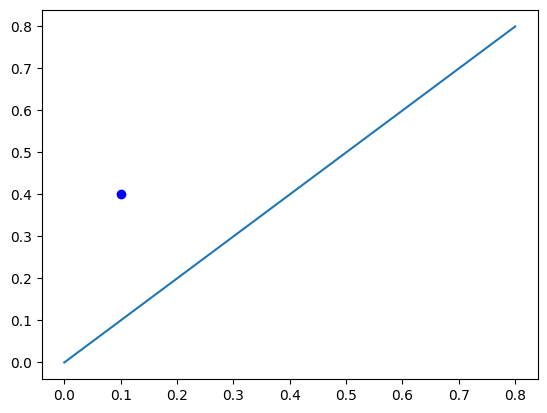

In [61]:
dim = 1
points = []
for p in persistence:
    if p[0] == dim:
        if p[1][1] == float("inf"):
            print("inf")
        points.append(p[1])

points = np.array(points)
x = np.linspace(0, np.max(points[:,0]))
plt.plot(points[:,0], points[:, 1], "bo")
plt.plot(x,x)
plt.show()

#### Show all slices

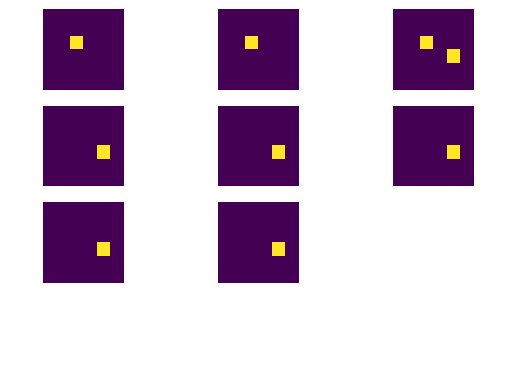

In [62]:

        
plt.show()

In [ ]:
%matplotlib widget
coordsList = getCubeCoordinates(space)
plotCubes(coordsList, spaceShape)
plt.show()


# NEW STUF

In [3]:
from evasion import *

In [93]:
def giveSpaceTimeDirection2(space, step = 0.1):
    spaceShape = np.shape(space)
    
    spaceStep = step/(spaceShape[1]*spaceShape[2])
    spaceSliceValues = np.array([(i+1)*spaceStep for i in range(spaceShape[1]*spaceShape[2]-1, -1, -1)])
    spaceSliceValues = np.reshape(spaceSliceValues, (1,spaceShape[1], spaceShape[2]))

    n_slices = spaceShape[0]
    timeSliceValues = np.array([(i+1)*step for i in range(n_slices)])
    tmin, tmax1 = timeSliceValues[[0, -1]]
    t_inf = tmax1*10
    timeSliceValues = np.reshape(timeSliceValues, (n_slices,1,1))
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (timeSliceValues + spaceSliceValues)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmin, tmax1, t_inf

def giveSpaceTimeDirection(space, step = 0.1):
    n_slices = np.shape(space)[0]
    sliceValues = np.array([(i+1)*step for i in range(n_slices)])
    tmin, tmax1 = sliceValues[[0, -1]]
    t_inf = tmax1*10
    sliceValues = np.reshape(sliceValues, (n_slices,1,1))
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * sliceValues
    newSpace = np.round(newSpaceInf + newSpaceElse, 2)
    return newSpace, tmin, tmax1, t_inf

# def giveSpaceTimeDirectionDelay(space, timeDelay = 0, spaceDelay, step = 0.1):
#     n_slices = np.shape(space)[0]
#     sliceValues = np.array([(i+1)*step for i in range(n_slices)])
#     sliceValues = np.append(sliceValues[timeDelay:], sliceValues[:timeDelay])
#     tmin, tmax1 = sliceValues[[0, -1]]
#     t_inf = tmax1*10
#     sliceValues = np.reshape(sliceValues, (n_slices,1,1))
#     newSpaceInf = space*t_inf
#     newSpaceElse = (~space) * sliceValues
#     newSpace = np.round(newSpaceInf + newSpaceElse, 2)
#     return newSpace, tmin, tmax1, t_inf

def giveSpaceTimeAndSpaceDirectionDelay(space, timeDelay = 0, spaceDelay = 0, timeStep = 0.1):
    spaceShape = np.shape(space)
    
    spaceStep = timeStep/(spaceShape[1]*spaceShape[2])
    spaceSliceValues = np.array([(i+1)*spaceStep for i in range(spaceShape[1]*spaceShape[2],)])
    spaceSliceValues = np.append(spaceSliceValues[spaceDelay:], spaceSliceValues[:spaceDelay])
    spaceSliceValues = np.reshape(spaceSliceValues, (1,spaceShape[1], spaceShape[2]))

    n_slices = spaceShape[0]
    timeSliceValues = np.array([(i+1)*timeStep for i in range(n_slices)])
    tmin, tmax1 = timeSliceValues[[0, -1]]
    timeSliceValues = np.append(timeSliceValues[timeDelay:], timeSliceValues[:timeDelay])
    
    t_inf = tmax1*10
    timeSliceValues = np.reshape(timeSliceValues, (n_slices,1,1))
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (timeSliceValues + spaceSliceValues)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmin, tmax1, t_inf

def giveSpaceTimeLastSlice(space, timeDelay = 0, spaceDelay = 0, timeStep = 0.1, ):
    spaceShape = np.shape(space)

    addSpace = np.ones(spaceShape)*timeStep
    addSpace[timeDelay] = timeStep*spaceShape[0]

    spaceCoord = [spaceDelay//spaceShape[2], spaceDelay%spaceShape[2]]
    addSpace[timeDelay][spaceCoord[0]][spaceCoord[1]] = (spaceShape[0]+1)*timeStep
    tmin = timeStep
    tmax = np.max(addSpace)
    t_inf = np.max(addSpace)*10
    
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (addSpace)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmin, tmax, t_inf


def giveSpaceOrder(space, orderId = 0, delay = 0, timeStep = 0.1):
    spaceShape = np.shape(space)

    n_slices = spaceShape[orderId]
    timeSliceValues = np.array([(i+1)*timeStep for i in range(n_slices)])
    tmin, tmax1 = timeSliceValues[[0, -1]]
    timeSliceValues = np.append(timeSliceValues[delay:], timeSliceValues[:delay])
    
    t_inf = tmax1*10
    if orderId == 0:
        timeSliceValues = np.reshape(timeSliceValues, (n_slices,1,1))
    elif orderId == 1:
        timeSliceValues = np.reshape(timeSliceValues, (1, n_slices,1))
    elif orderId == 2:
        timeSliceValues = np.reshape(timeSliceValues, (1,1, n_slices))
    newSpaceInf = space*t_inf
    newSpaceElse = (~space) * (timeSliceValues)
    newSpace = np.round(newSpaceInf + newSpaceElse, 4)
    return newSpace, tmin, tmax1, t_inf

In [22]:
a = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
b = np.array([1,2])
b = np.reshape(b, (1,1,2))
# print(b)
print(a[:,:, 0])
print(a*b)

[[1 3]
 [5 7]]
[[[ 1  4]
  [ 3  8]]

 [[ 5 12]
  [ 7 16]]]


In [25]:
def getCoordsFromId(spaceDim, id):
    z = id // (spaceDim[1]*spaceDim[2])
    v = (id - z * spaceDim[1]*spaceDim[2]) // spaceDim[2]
    u = id - z * spaceDim[1]*spaceDim[2] - v * spaceDim[2]
    return [u, v, z]


In [101]:
def computeIdOfFinalCubeInLoop(newSpace, t_inf): # basicaly does path exists
    spaceShape = np.shape(newSpace)
    coords = np.array([[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])]) 
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
        
    cc_density_crater = gd.PeriodicCubicalComplex(
        dimensions = np.shape(newSpace),
        vertices = filts, # top_dimensional_cells esm zamenju z vertices ker... je delal...?
        periodic_dimensions = [1,0,0] # periodično v z dimenziji
        )
    persistence = cc_density_crater.persistence() # izračunaj persistenco
    zadnjiCube = cc_density_crater.vertices_of_persistence_pairs() # vrne pare cubov (birth, death) posameznih komplexov....
    listOfCubeCoords = []
    listOfCubeIds = []
    for p in persistence:
        # print(p)
        if p[0] == 1 and (p[1][1] == float("inf") and p[1][0] < t_inf):
            listOfCubeIds.append(zadnjiCube[1][1][0])
            listOfCubeCoords.append(coords[zadnjiCube[1][1][0]])

        elif p[0]==1 and (int(p[1][1]) == int(t_inf)):
            listOfCubeIds.append(zadnjiCube[0][1][0][0])
            listOfCubeCoords.append(coords[zadnjiCube[0][1][0][0]])
    return [listOfCubeIds, listOfCubeCoords]

def getAllIds(space):
    spaceShape = np.shape(space)
    ids = []
    coords = []
    for t in range(spaceShape[0]):
        print("time: ", t)
        for s in range(spaceShape[1]*spaceShape[2]):
            newSpace, tmin, tmax, t_inf = giveSpaceTimeAndSpaceDirectionDelay(space, t, s)
            listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, t_inf)
            if len(listOfCubeIds) == 0:
                return [[], []]
            for iii in range(len(listOfCubeIds)):
                if listOfCubeIds[iii] not in ids:
                    ids.append(listOfCubeIds[iii])
                    coords.append(listOfCubeCoords[iii])
    return np.array(ids), np.array(coords)

def getAllIds2(space):
    spaceShape = np.shape(space)
    ids = []
    coords = []
    for dim in range(3):
        for t in range(spaceShape[dim]):
            newSpace, tmin, tmax, t_inf = giveSpaceOrder(space, dim, t)
            id, coord = computeIdOfFinalCubeInLoop(newSpace, t_inf)
            if id < 0:
                return [-1, []]
            if id not in ids:
                ids.append(id)
                coords.append(coord)
    return np.array(ids), np.array(coords)

def getAllIds3(space):
    spaceShape = np.shape(space)
    ids = []
    coords = []
    for t in range(spaceShape[0]):
        print("time: ", t)
        for s in range(spaceShape[1]*spaceShape[2]):
    
            newSpace, tmin, tmax, t_inf = giveSpaceTimeLastSlice(space, t, s)
            listOfCubeIds, listOfCubeCoords = computeIdOfFinalCubeInLoop(newSpace, t_inf)
            if len(listOfCubeIds) == 0:
                return [[], []]
            for iii in range(len(listOfCubeIds)):
                if listOfCubeIds[iii] not in ids:
                    ids.append(listOfCubeIds[iii])
                    coords.append(listOfCubeCoords[iii])
    return np.array(ids), np.array(coords)

def findPath(space): # narobe pretvarja iz id v coordinate
    spaceShape = np.shape(space)
    ids, coords = getAllIds3(space)
    specialCoords = [getCoordsFromId(spaceShape, ids[i]) for i in range(len(ids))]
    specialCoords = np.array(specialCoords)
    return coords #(t, y, x)

### Testiranje

In [102]:
spaceShape = (7,6,5)
space = np.ones(spaceShape, dtype=bool)
space[0,1,0] = 0
space[1,[1,3,4,5],0] = 0
space[2,[1,3,5],0] = 0
space[3,[1,2,3,5],0] = 0
space[4,5,0] = 0
space[5,1:6,0] = 0
space[6:, 1, 0] = 0
space[:,0,3] = 0

# sensors = [[[0,4],[0,8]], [[2,0],[8,0]], [[5,2],[5,6]]]
# sensorSpace = SensorsSpace((10,10), sensors)
# space = sensorSpace.createSpace()



print(np.shape(space))
# newSpace, tmin, tmax, t_inf = giveSpaceTimeAndSpaceDirectionDelay(space, 0, 0)
# id, coord = computeIdOfFinalCubeInLoop(newSpace, t_inf)
ids, specialCoords = getAllIds3(space)
print(ids)

(7, 6, 5)
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
[  7 126  36 127   8  22  29  37 128   9  23  38 129  10  17  24  39 130
  40 131  12  19  26  33  13 132]


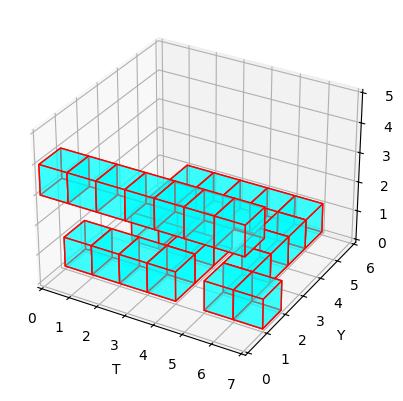

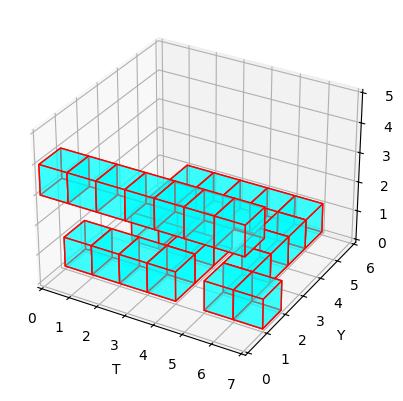

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
spaceShape = np.shape(space)
# nariši najdeno pot, (Če je več poti lahko prikaže tudi dele drugih poti)
# če je več poti mogoče sploh ne najde cele poti...idk
if len(specialCoords) > 0:
    for coord in specialCoords:
        draw_cube(ax, coord, size = 1)

ax.set_xlim(0, spaceShape[0])
ax.set_ylim(0, spaceShape[1])
ax.set_zlim(0, spaceShape[2])
ax.set_xlabel('T')
ax.set_ylabel('Y')
ax.set_zlabel('X')

# nariši celoten prostor
plotCubes(space)
